# Riskfolio-Lib Tutorial: 
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.net)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
<a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 

## Tutorial 24: Hierarchical Risk Parity (HRP) Portfolio Optimization

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")

yf.pdr_override()
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  25 of 25 completed


In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0257%,0.4057%,0.4036%,1.9693%,0.0180%,0.9305%,0.3678%,0.5783%,0.9483%,-1.1953%,...,1.5881%,0.0212%,2.8236%,0.9758%,0.6987%,1.7539%,-0.1730%,0.2409%,1.3735%,-1.0857%
2016-01-06,-11.4863%,-1.5879%,0.2411%,-1.7557%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.5547%,0.0212%,0.1592%,-1.5647%,-0.1466%,-1.0155%,-0.7653%,-3.0048%,-0.9035%,-2.9145%
2016-01-07,-5.1389%,-4.1922%,-1.6573%,-2.7699%,-1.1047%,-1.9769%,-1.2207%,-0.8855%,-4.6058%,-2.5394%,...,-2.2066%,-3.0309%,-1.0411%,-3.1557%,-1.6148%,-0.2700%,-2.2845%,-2.0570%,-0.5492%,-3.0019%
2016-01-08,0.2737%,-2.2705%,-1.6037%,-2.5425%,0.1099%,-0.2241%,0.5706%,-1.6402%,-1.7641%,-0.1649%,...,-0.1539%,-1.1366%,-0.7308%,-0.1448%,0.0895%,-3.3839%,-0.1117%,-1.1387%,-0.9719%,-1.1254%
2016-01-11,-4.3384%,0.1693%,-1.6851%,-1.0215%,0.0915%,-1.1791%,0.5674%,0.5287%,0.6616%,0.0331%,...,1.6436%,0.0000%,0.9869%,-0.1450%,1.2224%,1.4570%,0.5367%,-0.4607%,0.5800%,-1.9919%


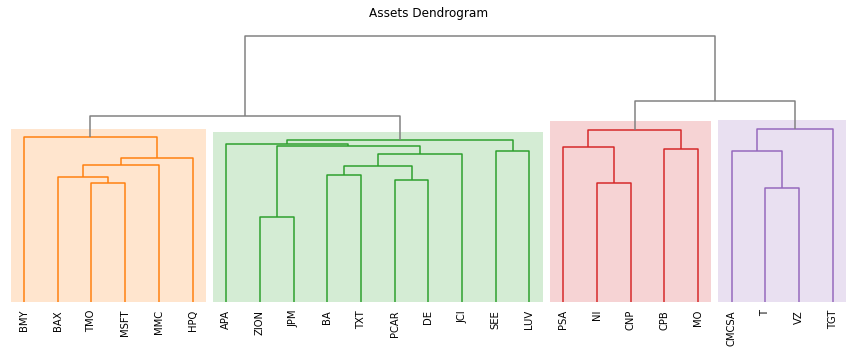

In [3]:
import riskfolio.PlotFunctions as plf

# Plotting Assets Clusters

ax = plf.plot_dendrogram(returns=Y,
                         correlation='pearson',
                         linkage='ward',
                         k=None,
                         max_k=10,
                         leaf_order=True,
                         ax=None)

The dendrogram above suggest that optimal number of clusters are four. However HRP portfolios don't use a number of clusters as input.

## 2. Estimating HRP Portfolio

This is the original model proposed by López de Prado (2016). Riskfolio-Lib expand this model to 14 risk measures.

### 2.1 Calculating the HRP portfolio

In [4]:
import riskfolio.HCPortfolio as hc

# Building the portfolio object
port = hc.HCPortfolio(returns=Y)

# Estimate optimal portfolio:

model='HRP' # Could be HRP or HERC
correlation = 'pearson' # Correlation matrix used to group assets in clusters
rm = 'MV' # Risk measure used, this time will be variance
rf = 0 # Risk free rate
linkage = 'single' # Linkage method used to build clusters
max_k = 10 # Max number of clusters used in two difference gap statistic, only for HERC model
leaf_order = True # Consider optimal order of leafs in dendrogram

w = port.optimization(model=model,
                      correlation=correlation,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,1.4532%,2.3219%,4.3929%,3.2428%,4.4309%,5.2399%,3.3760%,2.3251%,2.1737%,5.4304%,...,5.0535%,1.8956%,6.0066%,3.7516%,5.8463%,3.1672%,5.2292%,3.0520%,9.2348%,2.2749%


### 2.2 Plotting portfolio composition

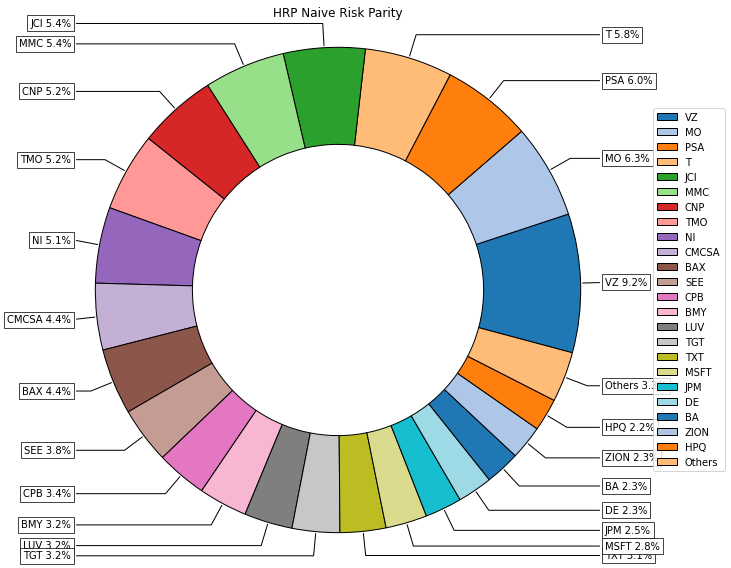

In [5]:
# Plotting the composition of the portfolio

ax = plf.plot_pie(w=w,
                  title='HRP Naive Risk Parity',
                  others=0.05,
                  nrow=25,
                  cmap="tab20",
                  height=8,
                  width=10,
                  ax=None)

### 2.3 Plotting Risk Contribution

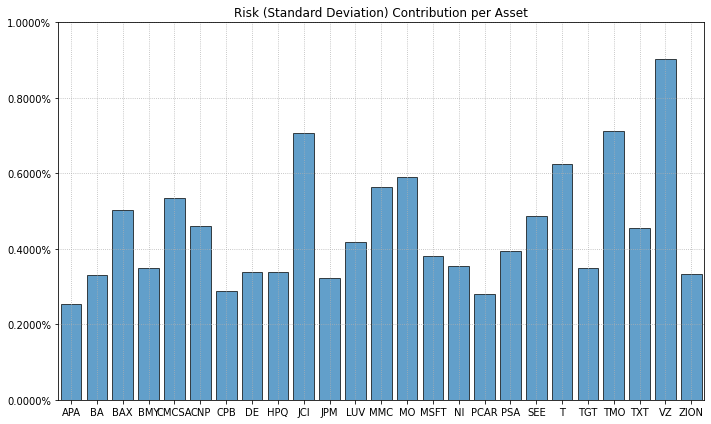

In [6]:
# Plotting the risk contribution per asset

mu = Y.mean()
cov = Y.cov() # Covariance matrix
returns = Y # Returns of the assets

ax = plf.plot_risk_con(w=w,
                       cov=cov,
                       returns=returns,
                       rm=rm,
                       rf=0,
                       alpha=0.05,
                       color="tab:blue",
                       height=6,
                       width=10,
                       t_factor=252,
                       ax=None)

### 2.4 Calculate Optimal HRP Portfolios for Several Risk Measures

In [7]:
# Risk Measures available:
#
# 'vol': Standard Deviation.
# 'MV': Variance.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'VaR': Conditional Value at Risk.
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'DaR': Drawdown at Risk of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.
# 'MDD_Rel': Maximum Drawdown of compounded cumulative returns (Calmar Ratio).
# 'ADD_Rel': Average Drawdown of compounded cumulative returns.
# 'DaR_Rel': Drawdown at Risk of compounded cumulative returns.
# 'CDaR_Rel': Conditional Drawdown at Risk of compounded cumulative returns.
# 'EDaR_Rel': Entropic Drawdown at Risk of compounded cumulative returns.
# 'UCI_Rel': Ulcer Index of compounded cumulative returns.

rms = ['vol', 'MV', 'MAD', 'MSV', 'FLPM', 'SLPM',
       'VaR','CVaR', 'EVaR', 'WR', 'MDD', 'ADD',
       'DaR', 'CDaR', 'EDaR', 'UCI', 'MDD_Rel', 'ADD_Rel',
       'DaR_Rel', 'CDaR_Rel', 'EDaR_Rel', 'UCI_Rel']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model,
                          correlation=correlation,
                          rm=i,
                          rf=rf,
                          linkage=linkage,
                          max_k=max_k,
                          leaf_order=leaf_order)

    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [8]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,vol,MV,MAD,MSV,FLPM,SLPM,VaR,CVaR,EVaR,WR,MDD,ADD,DaR,CDaR,EDaR,UCI,MDD_Rel,ADD_Rel,DaR_Rel,CDaR_Rel,EDaR_Rel,UCI_Rel
APA,2.18%,1.45%,2.04%,2.37%,1.89%,2.29%,2.22%,2.57%,2.76%,2.96%,1.58%,0.73%,0.98%,1.24%,1.39%,0.91%,1.84%,0.83%,1.20%,1.48%,1.63%,1.04%
BA,2.79%,2.32%,2.74%,2.74%,2.86%,2.80%,2.68%,2.76%,3.36%,3.95%,2.98%,3.82%,3.45%,3.14%,3.15%,3.63%,3.12%,3.89%,3.58%,3.25%,3.26%,3.75%
BAX,3.75%,4.39%,3.80%,3.61%,4.01%,3.70%,3.70%,3.58%,3.73%,4.15%,3.93%,5.99%,5.22%,5.02%,4.62%,5.67%,3.91%,5.95%,5.13%,4.94%,4.57%,5.65%
BMY,3.34%,3.24%,3.33%,3.02%,3.13%,2.94%,3.17%,2.94%,2.91%,2.77%,2.51%,1.18%,2.08%,2.11%,2.23%,1.46%,2.53%,1.19%,2.08%,2.11%,2.22%,1.46%
CMCSA,3.82%,4.43%,3.76%,3.77%,3.83%,3.81%,3.68%,3.77%,3.56%,3.47%,3.28%,3.36%,2.47%,2.78%,3.10%,3.01%,3.37%,3.49%,2.69%,3.02%,3.26%,3.17%
CNP,4.23%,5.24%,3.91%,4.25%,3.94%,4.31%,3.84%,4.41%,5.51%,5.74%,6.14%,6.05%,5.20%,5.23%,5.52%,6.10%,6.16%,6.07%,5.17%,5.35%,5.57%,6.13%
CPB,3.38%,3.38%,3.44%,3.56%,3.28%,3.49%,3.78%,3.73%,2.89%,2.57%,2.37%,1.04%,1.40%,1.68%,1.91%,1.28%,2.50%,1.09%,1.52%,1.84%,2.06%,1.34%
DE,2.79%,2.33%,2.83%,2.83%,2.95%,2.89%,2.66%,2.83%,3.73%,4.60%,3.81%,5.03%,4.41%,3.91%,3.91%,4.78%,3.61%,4.89%,4.29%,3.88%,3.85%,4.67%
HPQ,2.64%,2.17%,2.77%,2.57%,2.83%,2.59%,2.54%,2.48%,2.31%,2.42%,2.20%,2.61%,2.59%,2.69%,2.51%,2.58%,2.19%,2.56%,2.53%,2.61%,2.46%,2.51%
JCI,5.99%,5.43%,5.98%,6.15%,5.96%,6.14%,5.82%,6.25%,5.84%,5.52%,4.52%,3.65%,4.22%,4.81%,4.85%,4.02%,4.44%,3.45%,4.06%,4.57%,4.65%,3.79%


<AxesSubplot:>

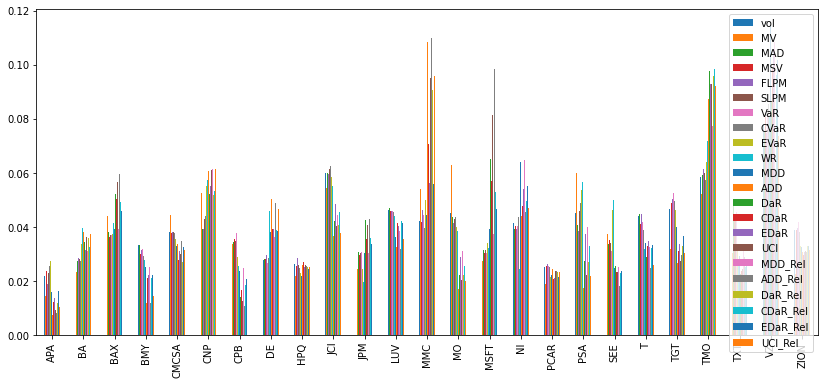

In [9]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)